In [1]:
# Save this file in the name of the ML model you are using
import pandas as pd
import numpy as np
import os

In [2]:
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

FILE_NAME = "train.csv"
# FILE_NAME = "icml_face_data.csv"
# FILE_NAME = "face_augmentated_3.csv"


IMAGES_FOR_TESTING = "data/Images_for_testing/"

In [3]:
data_path = ["data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv(file_path)
data = data.drop(index=WHITE_IMAGES, axis=0)

# If icml_face_data.csv is used
# data.drop(' Usage', axis=1, inplace=True)


In [4]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust.shape

(28261, 2)

In [5]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data["pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [6]:
X,y = data_X_y(data_exclude_disgust)

In [7]:
from builtins import range
from builtins import object

def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [8]:
print(X.shape)
X = reshape_X(X)
print(X.shape)

(28261, 48, 48, 1)
(28261, 2304)


In [9]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE()

X_rus, y_rus = rus.fit_resample(X,y) # This data is undersampled
X_ros, y_ros = ros.fit_resample(X,y) # This data is oversampled
X_smote, y_smote = smote.fit_resample(X,y) # This data is oversampled with smote

print(y_rus.value_counts())
print(y_ros.value_counts())
print(y_smote.value_counts())

6    3170
5    3170
4    3170
3    3170
2    3170
0    3170
Name: emotion, dtype: int64
6    7214
5    7214
4    7214
3    7214
2    7214
0    7214
Name: emotion, dtype: int64
6    7214
5    7214
4    7214
3    7214
2    7214
0    7214
Name: emotion, dtype: int64


In [10]:
def plot_train_test_distribution(y,loc='left', relative=True):
    width = 0.35
    CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, CLASS_NAMES_WITHOUT_DISGUST, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    plt.suptitle('relative amount of images per type')
    

In [11]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

NameError: name 'plt' is not defined

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(
    X_rus, 
    y_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42)

In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_ros, 
    y_ros, 
    test_size=0.3, 
    shuffle=True,
    random_state=42)

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.3, 
    shuffle=True,
    random_state=42)

In [ ]:
# These are the X & y that can be used for fitting a ML model
X_train, X_test, y_train, y_test
X_train_rus, X_test_rus, y_train_rus, y_test_rus
X_train_ros, X_test_ros, y_train_ros, y_test_ros
X_train_smote, X_test_smote, y_train_smote, y_test_smote
# X_hog, y # This does still have to be ros, rus or smote for balance and then split in to train & test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

In [46]:
def runRos(clf):  
#     X_train_ros, X_test_ros, y_train_ros, y_test_ros

    clf.fit(X_train_ros, y_train_ros)
    y_pred_ros = clf.predict(X_test_ros)

    score = accuracy_score(y_test_ros, y_pred_ros)
    score = score*100
    return str(round(score, 2))

In [47]:
def runSmote(clf):    
#     X_train_smote, X_test_smote, y_train_smote, y_test_smote

    clf.fit(X_train_smote, y_train_smote)
    y_pred_smote = clf.predict(X_test_smote)
    score = accuracy_score(y_test_smote, y_pred_smote)
    score = score*100
    return str(round(score, 2))

In [48]:
def runSGD():
    
    loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
    penalty = ['l2', 'l1', 'elasticnet']
    fit_intercept = [True, False]
    shuffle = [True, False]
    early_stopping = [True, False]
    warm_start = [True, False]
    
    rosResults = []
    smoteResults = []
    
    for a in loss:
        for b in penalty:
            for c in fit_intercept:
                for d in shuffle:
                    for e in early_stopping:
                        for f in warm_start:
                            
                            clf = SGDClassifier(loss = a, penalty = b, fit_intercept = c, shuffle = d, early_stopping = e, warm_start = f)
                            
                            print("Current parameters ",a,b,c,d,e,f)
                            
                            rosResults.append(runRos(clf))
                            smoteResults.append(runSmote(clf))
                            
                            print("Ros Results: ",rosResults)
                            print("Smote Results: ",smoteResults)


In [49]:
runSGD()

Current parameters  hinge l2 True True True True
Ros Results:  ['19.19']
Smote Results:  ['20.37']
Current parameters  hinge l2 True True True False
Ros Results:  ['19.19', '27.3']
Smote Results:  ['20.37', '23.89']
Current parameters  hinge l2 True True False True
Ros Results:  ['19.19', '27.3', '37.61']
Smote Results:  ['20.37', '23.89', '35.24']
Current parameters  hinge l2 True True False False
Ros Results:  ['19.19', '27.3', '37.61', '31.9']
Smote Results:  ['20.37', '23.89', '35.24', '37.31']
Current parameters  hinge l2 True False True True
Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02']
Smote Results:  ['20.37', '23.89', '35.24', '37.31', '26.68']
Current parameters  hinge l2 True False True False
Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98']
Smote Results:  ['20.37', '23.89', '35.24', '37.31', '26.68', '30.6']
Current parameters  hinge l2 True False False True
Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52']
Smote Resul

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Ros Results:  ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39

KeyboardInterrupt: 

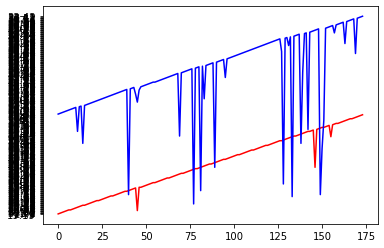

In [54]:
import matplotlib.pyplot as plt

rosResults = ['19.19', '27.3', '37.61', '31.9', '30.02', '28.98', '34.52', '34.52', '29.74', '26.3', '36.87', '34.91', '26.24', '28.68', '33.27', '33.27', '29.71', '33.16', '34.31', '31.3', '33.15', '31.67', '34.05', '34.05', '31.26', '31.69', '32.89', '30.91', '30.63', '29.54', '34.11', '34.11', '29.55', '28.46', '36.99', '35.28', '29.38', '27.12', '33.53', '33.53', '27.5', '24.22', '36.46', '31.57', '24.95', '28.98', '32.94', '32.94', '29.05', '31.15', '38.2', '26.27', '26.64', '29.68', '35.19', '35.19', '27.97', '30.3', '32.77', '37.83', '27.03', '28.82', '32.78', '32.78', '30.03', '33.12', '35.15', '35.01', '32.0', '32.33', '37.02', '37.02', '31.03', '28.14', '33.75', '32.47', '28.77', '28.39', '34.98', '34.98', '28.06', '31.39', '37.43', '38.0', '28.91', '26.22', '35.21', '35.21', '28.84', '19.21', '38.08', '34.38', '27.18', '26.82', '33.18', '33.18', '30.82', '22.19', '31.7', '32.26', '28.94', '31.8', '30.35', '30.35', '28.13', '24.36', '31.77', '34.84', '23.07', '29.02', '29.39', '29.39', '30.29', '31.1', '36.39', '35.6', '33.33', '32.51', '35.66', '35.66', '30.41', '32.08', '34.03', '32.07', '29.94', '30.32', '34.83', '34.83', '25.14', '19.23', '32.7', '22.03', '27.7', '30.0', '30.05', '30.05', '25.17', '34.13', '35.49', '33.98', '28.74', '23.3', '29.43', '29.43', '32.96', '34.06', '31.39', '32.29', '27.35', '29.13', '31.93', '31.93', '26.98', '25.59', '30.45', '30.0', '27.47', '31.4', '30.89', '30.89', '32.62', '31.92', '35.54', '34.7', '31.19', '29.42', '35.38', '35.38', '30.2', '30.37', '33.5', '34.0', '28.08', '30.16']
smoteResults = ['20.37', '23.89', '35.24', '37.31', '26.68', '30.6', '37.75', '34.02', '28.47', '26.35', '36.64', '29.43', '26.83', '24.87', '34.03', '34.46', '31.78', '33.51', '39.27', '35.9', '32.57', '31.94', '34.87', '35.25', '31.14', '30.1', '32.81', '36.21', '32.05', '28.28', '36.11', '34.77', '26.63', '25.37', '37.41', '41.04', '26.11', '30.87', '37.3', '37.35', '28.46', '29.78', '38.77', '38.15', '26.63', '32.57', '37.3', '35.58', '21.77', '29.86', '38.96', '27.86', '30.47', '34.47', '37.23', '37.23', '26.49', '24.86', '31.11', '37.52', '17.93', '24.94', '35.75', '35.65', '33.48', '25.05', '37.07', '37.97', '32.6', '30.05', '38.57', '38.34', '28.43', '30.97', '37.7', '34.95', '31.81', '33.16', '36.41', '36.66', '36.17', '27.5', '35.39', '30.1', '25.26', '31.35', '37.39', '37.5', '27.57', '31.39', '39.29', '38.48', '25.42', '22.09', '35.61', '35.75', '26.53', '27.45', '38.11', '33.35', '23.18', '25.91', '34.2', '34.15', '29.66', '21.91', '23.73', '35.71', '22.94', '30.48', '31.25', '31.23', '30.38', '32.38', '35.37', '36.36', '34.22', '31.95', '36.03', '36.86', '33.78', '32.9', '33.76', '35.16', '29.56', '31.32', '34.63', '35.71', '26.64', '31.22', '36.26', '34.22', '29.53', '29.54', '35.13', '34.99', '31.43', '18.14', '34.03', '38.34', '28.24', '25.08', '32.29', '32.3', '31.51', '27.43', '35.44', '33.72', '31.71', '28.46', '31.1', '31.19', '30.8', '26.65', '33.58', '31.28', '24.99', '25.08', '30.65', '30.73', '35.07', '35.23', '37.65', '36.86', '33.63', '33.06', '37.85', '37.4', '33.57', '29.66', '36.51', '36.12', '33.11', '33.42']

plt.plot(rosResults, color="red")
plt.plot(smoteResults, color="blue")
plt.show()

In [ ]:
# Indexes of good performing parameters (for searching in list use index - 1)

# ROS: 
# 3, 11, 35, 43, 51, 60, 71, 72, 83, 84, 91, 115

# SMOTE:
# 4, 7, 19, 35, 36, 39, 40 , 43, 44, 47, 55, 56, 60, 67, 68, 71, 72,  75,  87, 88 , 91, 92, 99, 140, 163

In [60]:
print("Ros Results:",rosResults[2], rosResults[10], rosResults[34], rosResults[42], rosResults[50], rosResults[59], rosResults[70], rosResults[71], rosResults[82], rosResults[90], rosResults[114])
print("Smote results:",smoteResults[3], smoteResults[6], smoteResults[18], smoteResults[34], smoteResults[35], smoteResults[38], smoteResults[39], smoteResults[42], smoteResults[43], smoteResults[46], smoteResults[54], smoteResults[55], smoteResults[59], smoteResults[66], smoteResults[67], smoteResults[70], smoteResults[71], smoteResults[74], smoteResults[86], smoteResults[87], smoteResults[90], smoteResults[91], smoteResults[98],smoteResults[139],smoteResults[162])

Ros Results: 37.61 36.87 36.99 36.46 38.2 37.83 37.02 37.02 37.43 38.08 36.39
Smote results: 37.31 37.75 39.27 37.41 41.04 37.3 37.35 38.77 38.15 37.3 37.23 37.23 37.52 37.07 37.97 38.57 38.34 37.7 37.39 37.5 39.29 38.48 38.11 38.34 37.65


In [82]:
    loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
    penalty = ['l2', 'l1', 'elasticnet']
    fit_intercept = [True, False]
    shuffle = [True, False]
    early_stopping = [True, False]
    warm_start = [True, False]
    
    
    rosList = [3, 11, 35, 43, 51, 60, 71, 72, 83, 84, 91, 115]
    smoteList = [4, 7, 19, 35, 36, 39, 40 , 43, 44, 47, 55, 56, 60, 67, 68, 71, 72,  75,  87, 88 , 91, 92, 99, 140, 163]
    
    rosParams = []
    smoteParams = []
    counter = 1
    
    for a in loss:
        for b in penalty:
            for c in fit_intercept:
                for d in shuffle:
                    for e in early_stopping:
                        for f in warm_start:
                            
                            
                            currentParams = [a, b, c, d, e, f]
                            
                            if counter in rosList:
                                rosParams.append(currentParams)
                                
                            if counter in smoteList:
                                smoteParams.append(currentParams)
                            counter = counter + 1
    print(rosParams)
    print ("==================================================================================================================================================================================================================================================================================")
    print(smoteParams)

[['hinge', 'l2', True, True, False, True], ['hinge', 'l2', False, True, False, True], ['hinge', 'elasticnet', True, True, False, True], ['hinge', 'elasticnet', False, True, False, True], ['log', 'l2', True, True, False, True], ['log', 'l2', False, True, False, False], ['log', 'l1', True, False, False, True], ['log', 'l1', True, False, False, False], ['log', 'elasticnet', True, True, False, True], ['log', 'elasticnet', True, True, False, False], ['log', 'elasticnet', False, True, False, True], ['modified_huber', 'l1', True, True, False, True]]
[['hinge', 'l2', True, True, False, False], ['hinge', 'l2', True, False, False, True], ['hinge', 'l1', True, True, False, True], ['hinge', 'elasticnet', True, True, False, True], ['hinge', 'elasticnet', True, True, False, False], ['hinge', 'elasticnet', True, False, False, True], ['hinge', 'elasticnet', True, False, False, False], ['hinge', 'elasticnet', False, True, False, True], ['hinge', 'elasticnet', False, True, False, False], ['hinge', 'elas

In [111]:
print(rosParams[0][2])

True


In [119]:
def runGoodParamsRos():
    
    rosResults = []
    smoteResults = []
    counter = 0
    
    for i in rosParams:               
        clf = SGDClassifier(loss = rosParams[counter][0], penalty =  rosParams[counter][1], fit_intercept = rosParams[counter][2], shuffle = rosParams[counter][3], early_stopping = rosParams[counter][4], warm_start = rosParams[counter][5])
        print(clf)
        counter = counter + 1
        
        rosResults.append(runRos(clf))
                          
    
    print("Ros Results: ",rosResults)


In [122]:
def runGoodParamsSmote():
    
    rosResults = []
    smoteResults = []
    counter = 0
    
    for i in smoteParams:               
        clf = SGDClassifier(loss = smoteParams[counter][0], penalty =  smoteParams[counter][1], fit_intercept = smoteParams[counter][2], shuffle = smoteParams[counter][3], early_stopping = smoteParams[counter][4], warm_start = smoteParams[counter][5])
        print(clf)
        counter = counter + 1
    
        smoteResults.append(runSmote(clf))

    print("Smote Results: ",smoteResults)


In [121]:
runGoodParamsRos()

SGDClassifier(warm_start=True)
SGDClassifier(fit_intercept=False, warm_start=True)
SGDClassifier(penalty='elasticnet', warm_start=True)
SGDClassifier(fit_intercept=False, penalty='elasticnet', warm_start=True)
SGDClassifier(loss='log', warm_start=True)
SGDClassifier(fit_intercept=False, loss='log')
SGDClassifier(loss='log', penalty='l1', shuffle=False, warm_start=True)
SGDClassifier(loss='log', penalty='l1', shuffle=False)
SGDClassifier(loss='log', penalty='elasticnet', warm_start=True)
SGDClassifier(loss='log', penalty='elasticnet')
SGDClassifier(fit_intercept=False, loss='log', penalty='elasticnet',
              warm_start=True)
SGDClassifier(loss='modified_huber', penalty='l1', warm_start=True)
Ros Results:  ['32.7', '35.74', '37.24', '23.97', '36.5', '34.68', '37.02', '37.02', '37.41', '35.5', '36.39', '35.19']


C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [123]:
runGoodParamsSmote()

SGDClassifier()
SGDClassifier(shuffle=False, warm_start=True)
SGDClassifier(penalty='l1', warm_start=True)
SGDClassifier(penalty='elasticnet', warm_start=True)
SGDClassifier(penalty='elasticnet')
SGDClassifier(penalty='elasticnet', shuffle=False, warm_start=True)
SGDClassifier(penalty='elasticnet', shuffle=False)
SGDClassifier(fit_intercept=False, penalty='elasticnet', warm_start=True)
SGDClassifier(fit_intercept=False, penalty='elasticnet')
SGDClassifier(fit_intercept=False, penalty='elasticnet', shuffle=False,
              warm_start=True)
SGDClassifier(loss='log', shuffle=False, warm_start=True)
SGDClassifier(loss='log', shuffle=False)
SGDClassifier(fit_intercept=False, loss='log')
SGDClassifier(loss='log', penalty='l1', warm_start=True)
SGDClassifier(loss='log', penalty='l1')
SGDClassifier(loss='log', penalty='l1', shuffle=False, warm_start=True)
SGDClassifier(loss='log', penalty='l1', shuffle=False)
SGDClassifier(fit_intercept=False, loss='log', penalty='l1', warm_start=True)
SGD

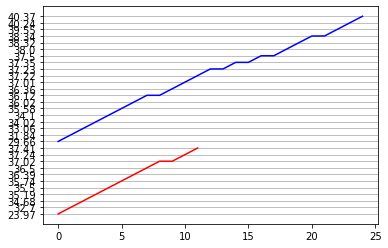

In [149]:
rosResultss = ['32.7', '35.74', '37.24', '23.97', '36.5', '34.68', '37.02', '37.02', '37.41', '35.5', '36.39', '35.19']
smoteResultss = ['40.24', '34.02', '38.32', '36.12', '36.36', '37.35', '37.35', '34.1', '31.84', '35.58', '37.23', '37.23', '38.0', '40.37', '39.55', '38.34', '38.34', '33.06', '37.5', '37.5', '36.02', '36.12', '37.01', '29.66', '37.22']
rosResultss.sort()
smoteResultss.sort()

plt.plot(rosResultss, color="red")
plt.plot(smoteResultss, color="blue")
plt.grid(axis='y', linestyle='-')
plt.show()


In [150]:
import pickle

In [158]:
def runandSaveGoodParamsRos():
    
    rosResults = []
    counter = 0
    filename = ''
    
    for i in rosParams:               
        clf = SGDClassifier(loss = rosParams[counter][0], penalty =  rosParams[counter][1], fit_intercept = rosParams[counter][2], shuffle = rosParams[counter][3], early_stopping = rosParams[counter][4], warm_start = rosParams[counter][5])
        print("Current params: ", clf)
        counter = counter + 1

        clf.fit(X_train_ros, y_train_ros)
        y_pred_ros = clf.predict(X_test_ros)

        score = accuracy_score(y_test_ros, y_pred_ros)
        score = score*100
        score = str(round(score, 2)) 

        print("Accuracy is: ", score)
        
        filename = score + '%_Ros_SGD'
        if score => 37:
            pickle.dump(clf, open(filename, 'wb'))
            print("Model saved to: ",filename)

SyntaxError: invalid syntax (<ipython-input-158-25792d492020>, line 22)

In [ ]:
def runandSaveGoodParamsSmote():

    smoteResults = []
    counter = 0
    filename = ''
    
    for i in smoteParams:               
        clf = SGDClassifier(loss = smoteParams[counter][0], penalty =  smoteParams[counter][1], fit_intercept = smoteParams[counter][2], shuffle = smoteParams[counter][3], early_stopping = smoteParams[counter][4], warm_start = smoteParams[counter][5])
        print("Current params: ", clf)
        counter = counter + 1
    
        clf.fit(X_train_smote, y_train_smote)
        y_pred_smote = clf.predict(X_test_smote)
        
        score = accuracy_score(y_test_smote, y_pred_smote)
        score = score*100
        score = str(round(score, 2))
        smoteResults.append(score)
        print("Accuracy is: ", score)
        
        filename = score + '%_Smote_SGD'
        if score => 38:
            pickle.dump(clf, open(filename, 'wb'))
            print("Model saved to:",filename)

In [156]:
runandSaveGoodParamsRos()

Current params:  SGDClassifier(warm_start=True)
Accuracy is:  38.05
Model saved to:  38.05%_Ros_SGD
Current params:  SGDClassifier(fit_intercept=False, warm_start=True)
Accuracy is:  29.84
Model saved to:  29.84%_Ros_SGD
Current params:  SGDClassifier(penalty='elasticnet', warm_start=True)
Accuracy is:  36.81
Model saved to:  36.81%_Ros_SGD
Current params:  SGDClassifier(fit_intercept=False, penalty='elasticnet', warm_start=True)
Accuracy is:  37.61
Model saved to:  37.61%_Ros_SGD
Current params:  SGDClassifier(loss='log', warm_start=True)
Accuracy is:  36.35
Model saved to:  36.35%_Ros_SGD
Current params:  SGDClassifier(fit_intercept=False, loss='log')
Accuracy is:  37.97
Model saved to:  37.97%_Ros_SGD
Current params:  SGDClassifier(loss='log', penalty='l1', shuffle=False, warm_start=True)
Accuracy is:  37.02
Model saved to:  37.02%_Ros_SGD
Current params:  SGDClassifier(loss='log', penalty='l1', shuffle=False)
Accuracy is:  37.02
Model saved to:  37.02%_Ros_SGD
Current params:  SGDC

In [157]:
runandSaveGoodParamsSmote()

Current params:  SGDClassifier()
Accuracy is:  35.27
Model saved to: 35.27%_Smote_SGD
Current params:  SGDClassifier(shuffle=False, warm_start=True)
Accuracy is:  34.02
Model saved to: 34.02%_Smote_SGD
Current params:  SGDClassifier(penalty='l1', warm_start=True)
Accuracy is:  28.17
Model saved to: 28.17%_Smote_SGD
Current params:  SGDClassifier(penalty='elasticnet', warm_start=True)
Accuracy is:  30.05
Model saved to: 30.05%_Smote_SGD
Current params:  SGDClassifier(penalty='elasticnet')
Accuracy is:  37.43
Model saved to: 37.43%_Smote_SGD
Current params:  SGDClassifier(penalty='elasticnet', shuffle=False, warm_start=True)
Accuracy is:  37.35
Model saved to: 37.35%_Smote_SGD
Current params:  SGDClassifier(penalty='elasticnet', shuffle=False)
Accuracy is:  37.35
Model saved to: 37.35%_Smote_SGD
Current params:  SGDClassifier(fit_intercept=False, penalty='elasticnet', warm_start=True)
Accuracy is:  36.53
Model saved to: 36.53%_Smote_SGD
Current params:  SGDClassifier(fit_intercept=False,

In [168]:
modelname = '38.05%_Ros_SGD'

loaded_model = pickle.load(open(modelname, 'rb'))

y_pred_smote = loaded_model.predict(X_test_smote)

score = accuracy_score(y_test_ros, y_pred_smote)
score = score*100
score = str(round(score, 2)) 

print("Accuracy is: ", score)

Accuracy is:  43.22


In [169]:
runandSaveGoodParamsRos()
runandSaveGoodParamsSmote()

Current params:  SGDClassifier(warm_start=True)
Accuracy is:  35.15
Model saved to:  35.15%_Ros_SGD
Current params:  SGDClassifier(fit_intercept=False, warm_start=True)
Accuracy is:  29.33
Model saved to:  29.33%_Ros_SGD
Current params:  SGDClassifier(penalty='elasticnet', warm_start=True)
Accuracy is:  33.07
Model saved to:  33.07%_Ros_SGD
Current params:  SGDClassifier(fit_intercept=False, penalty='elasticnet', warm_start=True)
Accuracy is:  29.17
Model saved to:  29.17%_Ros_SGD
Current params:  SGDClassifier(loss='log', warm_start=True)
Accuracy is:  33.36
Model saved to:  33.36%_Ros_SGD
Current params:  SGDClassifier(fit_intercept=False, loss='log')
Accuracy is:  34.56
Model saved to:  34.56%_Ros_SGD
Current params:  SGDClassifier(loss='log', penalty='l1', shuffle=False, warm_start=True)
Accuracy is:  36.09
Model saved to:  36.09%_Ros_SGD
Current params:  SGDClassifier(loss='log', penalty='l1', shuffle=False)
Accuracy is:  36.09
Model saved to:  36.09%_Ros_SGD
Current params:  SGDC

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Accuracy is:  35.72
Model saved to:  35.72%_Ros_SGD
Current params:  SGDClassifier()
Accuracy is:  31.02
Model saved to: 31.02%_Smote_SGD
Current params:  SGDClassifier(shuffle=False, warm_start=True)
Accuracy is:  38.41
Model saved to: 38.41%_Smote_SGD
Current params:  SGDClassifier(penalty='l1', warm_start=True)
Accuracy is:  38.05
Model saved to: 38.05%_Smote_SGD
Current params:  SGDClassifier(penalty='elasticnet', warm_start=True)
Accuracy is:  36.27
Model saved to: 36.27%_Smote_SGD
Current params:  SGDClassifier(penalty='elasticnet')
Accuracy is:  28.44
Model saved to: 28.44%_Smote_SGD
Current params:  SGDClassifier(penalty='elasticnet', shuffle=False, warm_start=True)
Accuracy is:  35.99
Model saved to: 35.99%_Smote_SGD
Current params:  SGDClassifier(penalty='elasticnet', shuffle=False)
Accuracy is:  35.99
Model saved to: 35.99%_Smote_SGD
Current params:  SGDClassifier(fit_intercept=False, penalty='elasticnet', warm_start=True)
Accuracy is:  33.56
Model saved to: 33.56%_Smote_SGD

In [164]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.4, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_smote, loc='left')
plot_train_test_distribution(y_test_smote, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_smote)), 
    'test ({0} photos)'.format(len(y_test_smote))
]);

Accuracy is:  36.66


In [172]:
from sklearn.metrics import plot_confusion_matrix

Accuracy is:  39.47


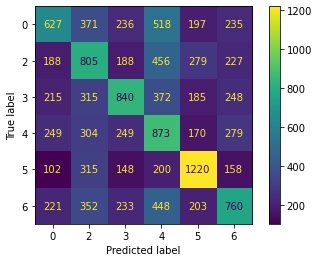

In [176]:
modelname = '39.74%_Smote_SGD'

loaded_model = pickle.load(open(modelname, 'rb'))

y_pred_smote = loaded_model.predict(X_test_smote)

score = accuracy_score(y_test_ros, y_pred_smote)
score = score*100
score = str(round(score, 2)) 

print("Accuracy is: ", score)

plot_confusion_matrix(loaded_model, X_test_smote, y_test_smote)



Accuracy is:  40.79


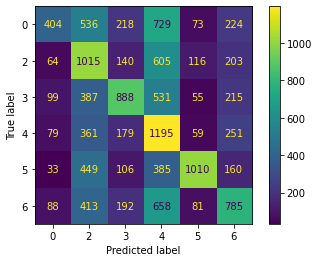

In [177]:
modelname = '38.05%_Ros_SGD'

loaded_model = pickle.load(open(modelname, 'rb'))

y_pred_smote = loaded_model.predict(X_test_smote)

score = accuracy_score(y_test_ros, y_pred_smote)
score = score*100
score = str(round(score, 2)) 

print("Accuracy is: ", score)

plot_confusion_matrix(loaded_model, X_test_smote, y_test_smote)


In [178]:
runandSaveGoodParamsRos()
runandSaveGoodParamsSmote()

Current params:  SGDClassifier(warm_start=True)
Accuracy is:  37.61
Model saved to:  37.61%_Ros_SGD
Current params:  SGDClassifier(fit_intercept=False, warm_start=True)
Accuracy is:  36.26
Model saved to:  36.26%_Ros_SGD
Current params:  SGDClassifier(penalty='elasticnet', warm_start=True)
Accuracy is:  35.29
Model saved to:  35.29%_Ros_SGD
Current params:  SGDClassifier(fit_intercept=False, penalty='elasticnet', warm_start=True)
Accuracy is:  33.76
Model saved to:  33.76%_Ros_SGD
Current params:  SGDClassifier(loss='log', warm_start=True)
Accuracy is:  39.72
Model saved to:  39.72%_Ros_SGD
Current params:  SGDClassifier(fit_intercept=False, loss='log')
Accuracy is:  30.97
Model saved to:  30.97%_Ros_SGD
Current params:  SGDClassifier(loss='log', penalty='l1', shuffle=False, warm_start=True)
Accuracy is:  36.56
Model saved to:  36.56%_Ros_SGD
Current params:  SGDClassifier(loss='log', penalty='l1', shuffle=False)
Accuracy is:  36.56
Model saved to:  36.56%_Ros_SGD
Current params:  SGDC